Connected to fvc_structure (Python 3.10.18)

🔄 Running GeFolki alignment...
✅ Optical flow computed in 17.85 minutes
💾 Saved flow fields to:
  /media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/thinned_voxel/flow_u.npy
  /media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/thinned_voxel/flow_v.npy
✅ Aligned LiDAR DEM saved to: /media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/thinned_voxel/dem_3cm_lidar_resampled_to_sfm_aligned_to_sfm.tif


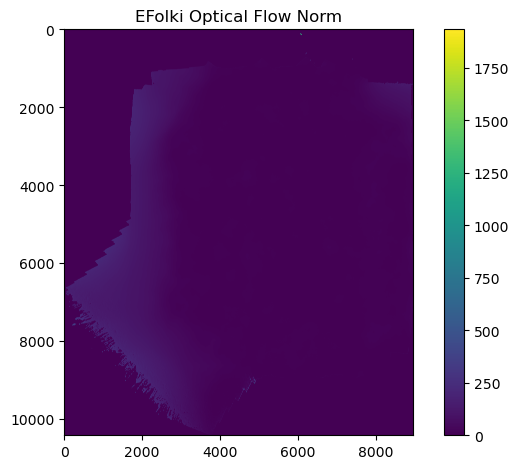

In [ ]:
import sys
import numpy as np
import rasterio
import time
import pylab as pl
from pathlib import Path

# === GeFolki dependencies ===
sys.path.append('/media/laura/laura_usb/code/fvc_structure/gefolki/python')
from python.algorithm import EFolki
from python.tools import wrapData

# === Input DEM/DSM paths ===
sfm_dsm_path = Path("/media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/thinned_voxel/dsm_3cm_from_sfm.tif")
lidar_dem_path = Path("/media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/thinned_voxel/dem_3cm_lidar_resampled_to_sfm.tif")  # You should have this

# === Load raster data ===
def load_and_mask(path):
    with rasterio.open(path) as src:
        arr = src.read(1).astype(np.float32)
        profile = src.profile
        nodata = src.nodata if src.nodata is not None else -9999
        mask = arr != nodata
        arr[~mask] = 0
        return arr, mask, profile

master_dsm, mask_master, profile = load_and_mask(sfm_dsm_path)   # RGB-derived surface
slave_dem, mask_slave, _         = load_and_mask(lidar_dem_path) # LiDAR-derived DEM

# === Ensure same shape ===
if master_dsm.shape != slave_dem.shape:
    raise ValueError("⚠️ Master and slave rasters must be the same shape. Resample the DEM if needed.")

# === Run EFolki ===
print("🔄 Running GeFolki alignment...")
start = time.perf_counter()

flow_u, flow_v = EFolki(
    master_dsm,
    slave_dem,
    iteration=8,
    radius=[16, 8, 4],
    rank=4,
    levels=6
)

elapsed_min = (time.perf_counter() - start) / 60
print(f"✅ Optical flow computed in {elapsed_min:.2f} minutes")

# === Save flow fields ===
flow_dir = sfm_dsm_path.parent
np.save(flow_dir / "flow_u.npy", flow_u)
np.save(flow_dir / "flow_v.npy", flow_v)
print(f"💾 Saved flow fields to:\n  {flow_dir/'flow_u.npy'}\n  {flow_dir/'flow_v.npy'}")

# === Optional: plot flow norm ===
flow_norm = np.sqrt(flow_u**2 + flow_v**2)
pl.figure()
pl.imshow(flow_norm, cmap='viridis')
pl.title('EFolki Optical Flow Norm')
pl.colorbar()
pl.tight_layout()
pl.savefig(flow_dir / "flow_norm.png", dpi=300)

# === Warp the slave DEM using flow ===
aligned_lidar = wrapData(slave_dem, flow_u, flow_v)

# === Save aligned DEM ===
aligned_path = lidar_dem_path.with_name(lidar_dem_path.stem + "_aligned_to_sfm.tif")
profile.update(dtype='float32')

with rasterio.open(aligned_path, "w", **profile) as dst:
    dst.write(aligned_lidar.astype('float32'), 1)

print(f"✅ Aligned LiDAR DEM saved to: {aligned_path}")

Connected to fvc_structure (Python 3.10.18)

🔄 Running GeFolki alignment...
✅ Optical flow computed in 15.68 minutes
💾 Saved flow fields to:
  /media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/sfm_dense/flow_u.npy
  /media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/sfm_dense/flow_v.npy
✅ Aligned LiDAR DEM saved to: /media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/cloud2453cf90763afd91_dsm_3cm_resampled_to_sfm_aligned_to_sfm.tif


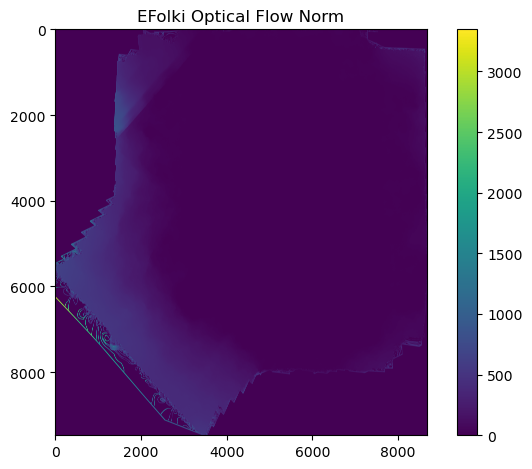

In [ ]:
import sys
import numpy as np
import rasterio
import time
import pylab as pl
from pathlib import Path

# === GeFolki dependencies ===
sys.path.append('/media/laura/laura_usb/code/fvc_structure/gefolki/python')
from python.algorithm import EFolki
from python.tools import wrapData

# === Input DEM/DSM paths ===
sfm_dsm_path = Path("/media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/sfm_dense/SASMDD0011_dsm_3cm.tif")
lidar_dem_path = Path("/media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/cloud2453cf90763afd91_dsm_3cm_resampled_to_sfm.tif")  # You should have this

# === Load raster data ===
def load_and_mask(path):
    with rasterio.open(path) as src:
        arr = src.read(1).astype(np.float32)
        profile = src.profile
        nodata = src.nodata if src.nodata is not None else -9999
        mask = arr != nodata
        arr[~mask] = 0
        return arr, mask, profile

master_dsm, mask_master, profile = load_and_mask(sfm_dsm_path)   # RGB-derived surface
slave_dem, mask_slave, _         = load_and_mask(lidar_dem_path) # LiDAR-derived DEM

# === Ensure same shape ===
if master_dsm.shape != slave_dem.shape:
    raise ValueError("⚠️ Master and slave rasters must be the same shape. Resample the DEM if needed.")

# === Run EFolki ===
print("🔄 Running GeFolki alignment...")
start = time.perf_counter()

flow_u, flow_v = EFolki(
    master_dsm,
    slave_dem,
    iteration=8,
    radius=[16, 8, 4],
    rank=4,
    levels=6
)

elapsed_min = (time.perf_counter() - start) / 60
print(f"✅ Optical flow computed in {elapsed_min:.2f} minutes")

# === Save flow fields ===
flow_dir = sfm_dsm_path.parent
np.save(flow_dir / "flow_u.npy", flow_u)
np.save(flow_dir / "flow_v.npy", flow_v)
print(f"💾 Saved flow fields to:\n  {flow_dir/'flow_u.npy'}\n  {flow_dir/'flow_v.npy'}")

# === Optional: plot flow norm ===
flow_norm = np.sqrt(flow_u**2 + flow_v**2)
pl.figure()
pl.imshow(flow_norm, cmap='viridis')
pl.title('EFolki Optical Flow Norm')
pl.colorbar()
pl.tight_layout()
pl.savefig(flow_dir / "flow_norm.png", dpi=300)

# === Warp the slave DEM using flow ===
aligned_lidar = wrapData(slave_dem, flow_u, flow_v)

# === Save aligned DEM ===
aligned_path = lidar_dem_path.with_name(lidar_dem_path.stem + "_aligned_to_sfm.tif")
profile.update(dtype='float32')

with rasterio.open(aligned_path, "w", **profile) as dst:
    dst.write(aligned_lidar.astype('float32'), 1)

print(f"✅ Aligned LiDAR DEM saved to: {aligned_path}")

# 🔄 Running GeFolki alignment...
# ✅ Optical flow computed in 17.85 minutes
# 💾 Saved flow fields to:
#   /media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/thinned_voxel/flow_u.npy
#   /media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/thinned_voxel/flow_v.npy
# ✅ Aligned LiDAR DEM saved to: /media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/thinned_voxel/dem_3cm_lidar_resampled_to_sfm_aligned_to_sfm.tif

No kernel connected

In [ ]:
### TEST 2
import sys
import numpy as np
import rasterio
import time
import pylab as pl
import matplotlib.pyplot as plt
from pathlib import Path

# === GeFolki dependencies ===
sys.path.append('/media/laura/laura_usb/code/fvc_structure/gefolki/python')
from python.algorithm import EFolki
from python.tools import wrapData

# === Parameters ===
iteration = 8
radius = [16, 8, 4]
rank = 4
levels = 6

# === Input DEM/DSM paths ===
sfm_dsm_path = Path("/media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/sfm_dense/SASMDD0011_dsm_3cm.tif")
lidar_dem_path = Path("/media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/cloud2453cf90763afd91_dsm_3cm_resampled_to_sfm.tif")

# === Load raster data ===
def load_and_mask(path):
    with rasterio.open(path) as src:
        arr = src.read(1).astype(np.float32)
        profile = src.profile
        nodata = src.nodata if src.nodata is not None else -9999
        mask = arr != nodata
        arr[~mask] = 0
        return arr, mask, profile

Text(0.5, 1.0, 'Moving image DSM from LiDAR')

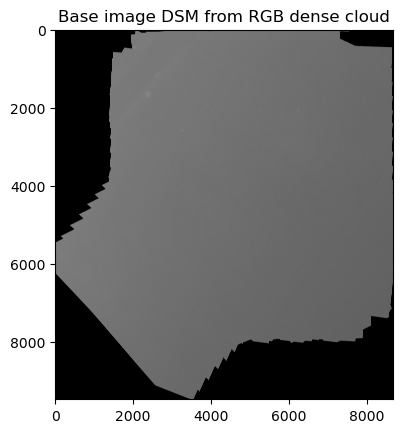

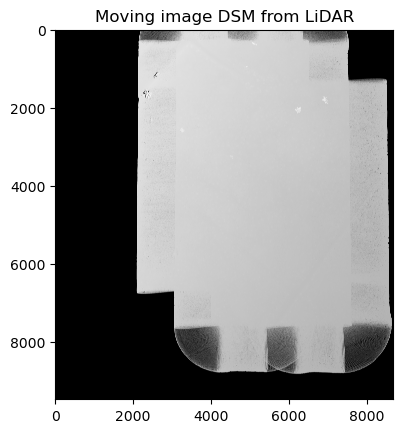

In [ ]:
### TEST 2
import sys
import numpy as np
import rasterio
import time
import pylab as pl
from pathlib import Path

# === GeFolki dependencies ===
sys.path.append('/media/laura/laura_usb/code/fvc_structure/gefolki/python')
from python.algorithm import EFolki
from python.tools import wrapData

# === Toggle: Select band from base image ===
Base_band = 0  # 0=Red, 1=Green, 2=Blue

# === Input paths ===
base_image_path = Path("/media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/sfm_dense/SASMDD0011_dsm_3cm.tif")
moving_image_path = Path("/media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/cloud2453cf90763afd91_dsm_3cm_resampled_to_sfm.tif")

# === Load selected band from base RGB ===
def load_band(path, band_idx):
    with rasterio.open(path) as src:
        if band_idx >= src.count:
            raise ValueError(f"Requested band index {band_idx} exceeds total bands ({src.count})")
        arr = src.read(band_idx + 1).astype(np.float32)
        nodata = src.nodata if src.nodata is not None else -9999
        arr[arr == nodata] = 0
        profile = src.profile
        return arr, profile


# === Load base and moving ===
base_band_data, profile = load_band(base_image_path, Base_band)
moving_image, _ = load_band(moving_image_path, 0)  # DEM is single-band

# === Plot base band and moving ===
pl.figure()
pl.imshow(base_band_data, cmap='gray')
pl.title(f"Base image DSM from RGB dense cloud")

pl.figure()
pl.imshow(moving_image, cmap='gray')
pl.title("Moving image DSM from LiDAR")

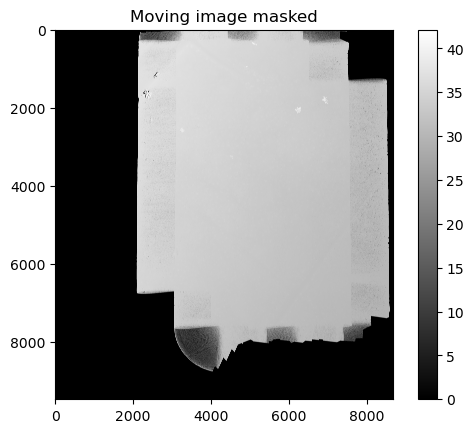

In [ ]:
# === Apply mask from base ===
mask = base_band_data > 0.0
base_band_data *= mask
moving_image *= mask

pl.figure()
pl.imshow(moving_image, cmap='gray')
pl.title("Moving image masked")
pl.colorbar()

Calculating flow...

✅ Flow calculated in 15.770 minutes


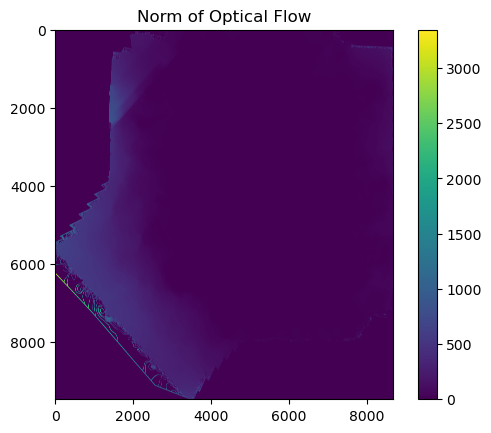

In [ ]:
# === Calculate optical flow ===
print("Calculating flow...\n")
t0 = time.perf_counter()
u, v = EFolki(base_band_data, moving_image, iteration=8, radius=[16, 8, 4], rank=4, levels=6)
t1 = time.perf_counter()
print(f"✅ Flow calculated in {(t1 - t0)/60:.3f} minutes")

# === Norm of flow ===
N = np.sqrt(u**2 + v**2)
pl.figure()
pl.imshow(N, cmap='viridis')
pl.title("Norm of Optical Flow")
pl.colorbar()

Registering image...



Text(0.5, 1.0, 'Registered image')

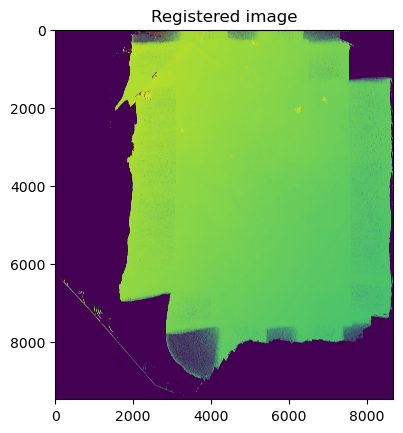

In [ ]:
# === Register image ===
print("Registering image...\n")
imag_reg = wrapData(moving_image, u, v)

pl.figure()
pl.imshow(imag_reg)
pl.title("Registered image")

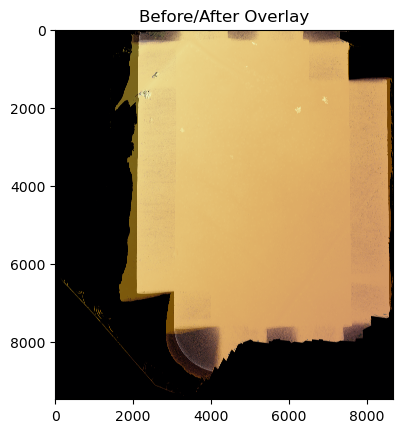

In [ ]:
# === Overlay: Before vs After ===
from matplotlib import cm

pl.figure()
pl.title("Before/After Overlay")
pl.imshow(moving_image, cmap='gray')
pl.imshow(imag_reg, cmap=cm.inferno, alpha=0.5)

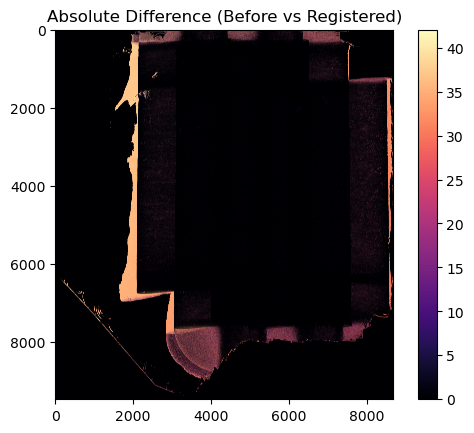

In [ ]:
# === Absolute Difference Plot ===
from matplotlib import cm

pl.figure()
pl.imshow(np.abs(moving_image - imag_reg), cmap='magma')
pl.title("Absolute Difference (Before vs Registered)")
pl.colorbar()

In [ ]:
# === Save flow and registered image ===
flow_dir = base_image_path.parent
np.save(flow_dir / "flow_u.npy", u)
np.save(flow_dir / "flow_v.npy", v)
print(f"💾 Flow saved to: {flow_dir/'flow_u.npy'} and {flow_dir/'flow_v.npy'}")

aligned_path = moving_image_path.with_name(moving_image_path.stem + "_aligned_to_rgb.tif")
profile.update(dtype='float32')

with rasterio.open(aligned_path, "w", **profile) as dst:
    dst.write(imag_reg.astype('float32'), 1)

print(f"✅ Registered image saved to: {aligned_path}")

💾 Flow saved to: /media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/sfm_dense/flow_u.npy and /media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/sfm_dense/flow_v.npy
✅ Registered image saved to: /media/laura/laura_usb/qgis/calperumResearch/site2_1_DD0011/lidar/cloud2453cf90763afd91_dsm_3cm_resampled_to_sfm_aligned_to_rgb.tif


In [ ]:
# === OPTIONAL: Apply warp to all bands in a multiband image ===
print("\n🌀 Applying warp to all bands in a 3D array...")


🌀 Applying warp to all bands in a 3D array...


In [ ]:
# === OPTIONAL: Apply warp to all bands in a multiband image ===
print("\n🌀 Applying warp to all bands in a 3D array...")


# === Load full multiband stack (example: multispectral tif) ===
# For demo: simulate a stack with 3 identical bands
moving_stack = np.stack([moving_image] * 3, axis=2)

# Apply mask to every band
expanded_mask = np.expand_dims(mask, axis=2)
moving_stack *= expanded_mask

# Allocate output
processed_array = np.empty_like(moving_stack)

# Warp each band
t0 = time.perf_counter()
for band in range(moving_stack.shape[2]):
    print(f"Processing band {band + 1}/{moving_stack.shape[2]}...")
    im = moving_stack[:, :, band]
    processed_array[:, :, band] = wrapData(im, u, v)
t1 = time.perf_counter()
print("⏱️ It took %.3f minutes to apply warp to all bands\n" % ((t1 - t0) / 60))


🌀 Applying warp to all bands in a 3D array...
Processing band 1/3...
Processing band 2/3...
Processing band 3/3...
⏱️ It took 0.121 minutes to apply warp to all bands

